# **MNIST Handwritten Digit Classification using a CNN**

## **Introduction**

**This notebook will help you understand the below points:**

*   A brief introduction to the MNIST Dataset and its importance in Computer Vision
*   Building a baseline classification model using a CNN
*   Evaluating the CNN model
*   Building an improved CNN
*   Finalizing the improved model for prediction on the test dataset




## **Introduction to the MNIST Dataset**

The **MNIST** dataset is an acronym that stands for the **Modified National Institute of Standards and Technology** dataset.

*   **This dataset consists of 60,000 grayscale images**, which are small 28x28 pixel images. 
<br> **These are images of handwritten digits from 0 to 9.**
*   **The task is to correctly classify the image of a handwritten digit into the right number**, that is - one of the 10 numbers from 0 to 9.
*   These numbers are mutually exclusive choices and we have over two choices in number, and hence **this represents a multi-class classification** problem in supervised learning.
*   **MNIST has been an important and widely-used dataset in machine learning and computer vision.** It is sometimes called the "Hello World" of computer vision, and is one of the first image datasets that all deep learning based computer vision practitioners learn to work with. A great amount of research have been carried out to outperform the existing state-of-the-art and achieve the best possible accuracy in classifying the images in MNIST. 
<br> It is hence a benchmark of sorts, to test the latest deep learning architectures in the field of computer vision.
*   More importantly for us, **MNIST is a dataset where Convolutional Neural Network (CNN) based approaches have shown excellent performance**, and that is what we will try to implement as part of this case study.






## **Importing the Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam,SGD

# The below code can be used to ignore the warnings that may occur due to deprecations
import warnings
warnings.filterwarnings("ignore")

## **Loading the Dataset**

*   The MNIST dataset is already present in TensorFlow and Keras, in the form of an **N-dimensional Numpy array**, so we can directly import the dataset from the package and use it.
*   The dataset can be imported as shown below: <br>
`from tensorflow.keras.datasets import mnist`<br>
`mnist.load_data()`
*   **mnist.load_data()** returns both the train and test data. The train data consists of 60,000 images in the form of Numpy arrays, while the test data consists of 10,000 images as Numpy arrays.





In [4]:
# Loading the data
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

Here the data is stored in a **3-dimensional Numpy array**. 
- The first dimension **60000** denotes **the number of images in the training data**, and each image is stacked on top of the other, making it a 3-dimensional Numpy array.
- The second and third dimensions **28, 28** denote the number of pixels along the height and width of the 2-dimensional image.

Below is a 2-dimensional Numpy representation (the pixelmap) of the first image in the training data. Each image is represented by 28x28 square pixel values.

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

The **target labels** are numerical digits between 0 to 9. 

In [6]:
X_test.shape

(10000, 28, 28)

The test dataset, on the other hand, has **10,000 images**. Each image, as before, is a 28x28 square image.

## **Data Visualization**

### **Converting the Numpy arrays to images and visualizing a few random images**

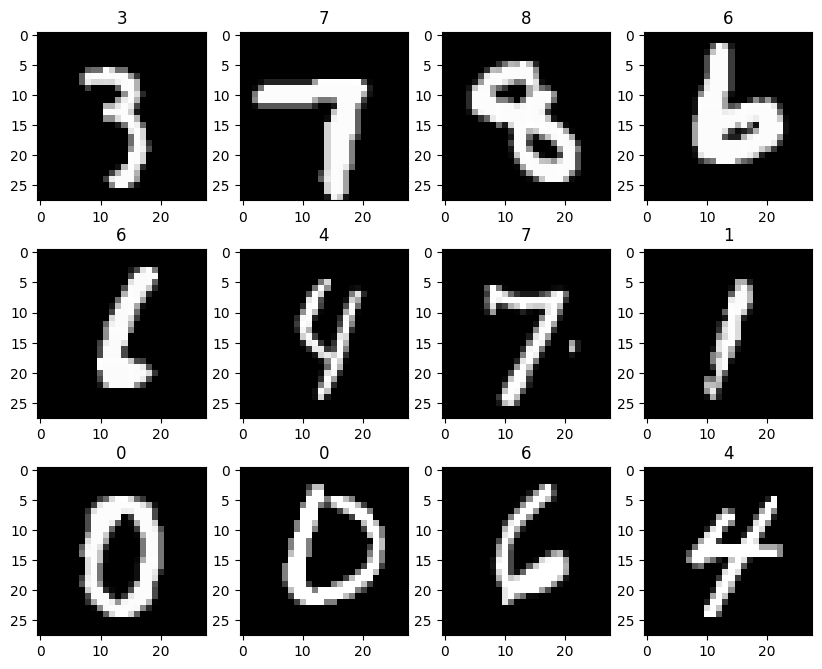

In [5]:
num_classes=10                                                                  # Number of Classes
categories=np.unique(y_train)                                                   # Obtaing the unique classes from y_train
rows = 3                                                                        # Defining number of rows=3
cols = 4                                                                        # Defining number of columns=4
fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))                       # Generating random indices from the data and plotting the images
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
        ax.imshow(X_train[random_index, :], cmap=plt.get_cmap('gray'))          # Plotting the image using cmap=gray
        ax.set_title(categories[y_train[random_index]])
plt.show()

In [6]:
# Plot distribution of each category 
count_plot = sns.countplot(y_train)

Error in callback <function flush_figures at 0x000002C2F1B5F920> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

We observe that **the dataset appears to be quite balanced**, with each category having approximately the same number of images. 

So **accuracy should be a good evaluation metric** for the model performance in this case study.

## **Data Preparation**

In the data preparation stage, **we generally reshape the dataset to have a single channel** and **we also normalize the feature inputs.**

Normalization is highly recommended as it has the following benefits when training a neural network model:

1. **Normalization makes the training faster and reduces the chances of getting stuck at a local optima.**
3. **Weight decay and estimation can be done more conveniently** with normalized inputs.
4. In deep neural networks, **normalization helps to avoid the Vanishing/Exploding gradient problem** The Vanishing/Exploding gradient problem occurs when very small or very large error gradients accumulate, and that results in either extremely small or very large updates to neural network model weights during the training process. This makes a model unstable and unable to learn from the training data.

As we already know, the images are in grayscale, so let us **reshape the arrays to just have a single channel**.

In [ ]:
# Reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

Since this is a **10-class classification problem**, **the output layer should have 10 neurons** which will provide us with the probabilities of the input image belonging to each of those 10 classes. Therefore, we also need to create a **one-hot encoded representation for the target classes.**

In [ ]:
# Creating one-hot encoded representation of target labels
# We can do this by using this utility function - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
# to_categorical() function is also explained in the Neural Networks Module

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

## **Model Building - Artificial Neural Network (ANN)**

### **Defining an Artificial Neural Network (ANN) Model**

Let's first create an ANN model as we have done previously. 

We will create this ANN sequentially, by adding the layers one after another.

First, let's **set the seed for the random number generators in Numpy, Python's Random package, and TensorFlow** to ensure we are able to reproduce these results every time we run the code.

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Let's now build a **sequential ANN model.**

In [ ]:
# Intializing a sequential model
ann_model = Sequential()

# Flatten the input to add dense convolutional layers on top of it
ann_model.add(Flatten(input_shape=(28, 28)))

# Adding a sequential layer with 100 neurons
ann_model.add(Dense(100, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
ann_model.add(Dense(10, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile model
ann_model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generating the summary of the model
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


**Let us understand the parameters in each layer:**
> 

*  **Flatten Layer** <br>
Here, the input shape to the layer is (28,28)<br>
It does not have any parameters, so the number of parameters is 0.<br>

*   **Fully Connected Dense Layer**<br>
Number of neurons: 100<br>
Number of parameters: (784x100)+(1x100): 78400+100: 78500<br>
` Number of neurons in current layer x number of neurons in the previous layer + 1 x number of neurons in current layer(Bias)`<br>

*   **Output Layer**<br>
Number of neurons: 10<br>
Number of parameters: (10x100)+(1x10) = 1010<br>
` Number of neurons in current layer x number of neurons in the previous layer( Here in the previous dense layer: 100) + 1 x number of neurons in current layer(Bias)`








<b> Fitting the model on the train data:

In [ ]:
history = ann_model.fit(
            X_train_normalized, y_train_encoded,
            epochs=15,
            validation_split=0.1,
            shuffle=True,
            batch_size=64,
            verbose=2
)

Epoch 1/15
844/844 - 5s - loss: 0.4176 - accuracy: 0.8819 - val_loss: 0.2073 - val_accuracy: 0.9413 - 5s/epoch - 6ms/step
Epoch 2/15
844/844 - 2s - loss: 0.2185 - accuracy: 0.9378 - val_loss: 0.1574 - val_accuracy: 0.9577 - 2s/epoch - 2ms/step
Epoch 3/15
844/844 - 2s - loss: 0.1653 - accuracy: 0.9529 - val_loss: 0.1271 - val_accuracy: 0.9653 - 2s/epoch - 2ms/step
Epoch 4/15
844/844 - 2s - loss: 0.1351 - accuracy: 0.9621 - val_loss: 0.1139 - val_accuracy: 0.9670 - 2s/epoch - 2ms/step
Epoch 5/15
844/844 - 2s - loss: 0.1147 - accuracy: 0.9671 - val_loss: 0.1030 - val_accuracy: 0.9700 - 2s/epoch - 2ms/step
Epoch 6/15
844/844 - 2s - loss: 0.0996 - accuracy: 0.9720 - val_loss: 0.0938 - val_accuracy: 0.9730 - 2s/epoch - 2ms/step
Epoch 7/15
844/844 - 2s - loss: 0.0880 - accuracy: 0.9750 - val_loss: 0.0876 - val_accuracy: 0.9762 - 2s/epoch - 2ms/step
Epoch 8/15
844/844 - 2s - loss: 0.0785 - accuracy: 0.9775 - val_loss: 0.0858 - val_accuracy: 0.9765 - 2s/epoch - 2ms/step
Epoch 9/15
844/844 - 2s 

### **Model Evaluation**

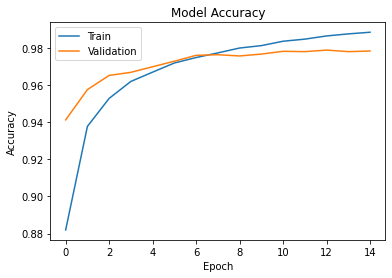

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 

*   We can see from the above plot that the model has perfomed well on the train and validation data, with a **validation accuracy of 97%.**


### **Evaluating the model on the test data**

In [ ]:
accuracy = ann_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

313/313 - 1s - loss: 0.0771 - accuracy: 0.9765 - 587ms/epoch - 2ms/step


### **Generating the Predictions using the test data**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=ann_model.predict(X_test_normalized)

### **Plotting the Confusion Matrix**

*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects the input to be of categorical values. But the y_test_encoded is an encoded value, and y_pred has probablities. So we need to get the categorical values back from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.





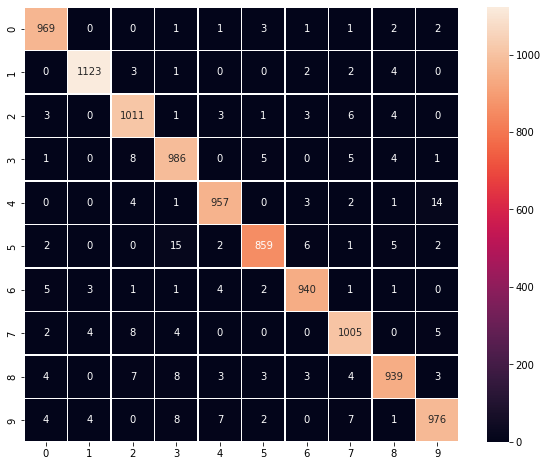

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**We observe that most of the classes are predicted correctly**, and the misclassification occurs mostly with the digit 4 which is sometimes confused with digit 9, and digit 5 which is sometimes confused with digit 3.

## **Model Building - Convolutional Neural Network (CNN)**

### **Defining a Convolutional Neural Network (CNN) Model**

Let's create a CNN model sequentially, where we will be adding the layers one after another.

First, we need to clear the previous model's history from the session. 

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's **set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow** to be able to reproduce the same results every time we run the code.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Let's build a **CNN Model**.<br>

The model has 2 main parts:
1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers for prediction.**<br><br>

The flow of our model would be as shown below:

*   Our model would start with a sequential Conv2D layer with 64 filters of 3x3 filter with the **ReLU** activation function. This will take as input an image of size (28x28x1).
*    We will also use padding in order to keep the output shape the same as that of the input shape. Hence, the hyperparameter padding = 'same'. 
<br> This layer would also be followed by a **Max Pooling** layer.
*   After this, we will have 2 more pairs of Conv2D and **Max Pooling** layers, having 32 filters with a 3x3 Kernel Size and a pooling size of (2,2).
*   We would flatten out the output from this pooling layer, and use a dense layer over that.
*   This will be a dense layer of 100 neurons (the same as the ANN)
*   We would have an output layer with 10 neurons, as we have 10 output classes in this multi-class classification problem.












In [ ]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(100, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(10, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 32)        

**Let us try to understand the parameters in the CNN layers:**
> 

*  **First Conv2D Layer** <br>
The input shape to the Conv2D layer: (28,28,1)<br>
The Size of the Filter: 3x3 <br>
The Number of Filters: 64<br>
The Number of parameters: (3x3x1+1)x64 = 640<br>
  `(width of filter in current layer x height of filter in current layer x number of filters in previous layer + bias) x number of filters in current layer`<br>

*   **Max Pooling Layer**<br>
Pooling has no trainable parameters, so the number of parameters: 0<br>

*   **Flatten**<br>
It does not have any trainable parameters, so the number of parameters: 0<br>

*   **Fully Connected Dense Layer**<br>
Number of neurons: 100<br>
Number of parameters: (100x512)+(1x100): 51300<br>
` Number of neurons in current layer x number of neurons in the previous layer (Here in max pooling layer: 14x14x16) + 1 x number of neurons in current layer (Bias)`<br>

*   **Output Layer**<br>
Number of neurons: 10<br>
Number of parameters: (10x100)+(1x10)=1010<br>
` Number of neurons in current layer x number of neurons in the previous layer (Here in the previous dense layer: 128) + 1 x number of neurons in current layer(Bias)`








### <b> Fitting the model on the train data

In [ ]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=15,
            validation_split=0.1,
            shuffle=True,
            batch_size=64,
            verbose=2
)

Epoch 1/15
844/844 - 12s - loss: 0.3191 - accuracy: 0.8960 - val_loss: 0.1079 - val_accuracy: 0.9677 - 12s/epoch - 14ms/step
Epoch 2/15
844/844 - 3s - loss: 0.0725 - accuracy: 0.9773 - val_loss: 0.0541 - val_accuracy: 0.9840 - 3s/epoch - 4ms/step
Epoch 3/15
844/844 - 3s - loss: 0.0522 - accuracy: 0.9838 - val_loss: 0.0458 - val_accuracy: 0.9880 - 3s/epoch - 4ms/step
Epoch 4/15
844/844 - 3s - loss: 0.0416 - accuracy: 0.9870 - val_loss: 0.0537 - val_accuracy: 0.9840 - 3s/epoch - 4ms/step
Epoch 5/15
844/844 - 3s - loss: 0.0353 - accuracy: 0.9888 - val_loss: 0.0384 - val_accuracy: 0.9888 - 3s/epoch - 4ms/step
Epoch 6/15
844/844 - 3s - loss: 0.0292 - accuracy: 0.9904 - val_loss: 0.0417 - val_accuracy: 0.9890 - 3s/epoch - 4ms/step
Epoch 7/15
844/844 - 3s - loss: 0.0239 - accuracy: 0.9921 - val_loss: 0.0418 - val_accuracy: 0.9895 - 3s/epoch - 4ms/step
Epoch 8/15
844/844 - 3s - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.0378 - val_accuracy: 0.9895 - 3s/epoch - 4ms/step
Epoch 9/15
844/844 - 

### **Model Evaluation**

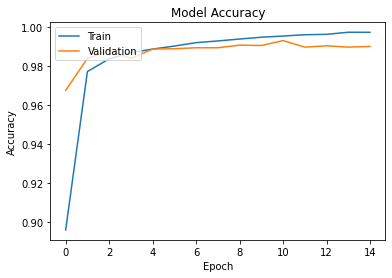

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 


*   We can see from the above plot that **the model has perfomed well on train and validation data with a validation accuracy of 98%.**






### **Evaluating the model on test data**

In [ ]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

313/313 - 1s - loss: 0.0304 - accuracy: 0.9914 - 723ms/epoch - 2ms/step


### **Generating the predictions using test data**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

In [ ]:
y_pred

array([[2.66181353e-15, 3.81052042e-13, 2.14736562e-12, ...,
        1.00000000e+00, 7.75563378e-16, 1.98781235e-11],
       [1.08800614e-10, 5.58348916e-07, 9.99999404e-01, ...,
        4.22445079e-14, 1.01340128e-12, 4.43997677e-16],
       [5.49646684e-09, 9.99995112e-01, 1.81279205e-08, ...,
        2.47621301e-06, 2.12286636e-06, 4.32171232e-09],
       ...,
       [3.07713835e-16, 9.46852839e-13, 3.12149746e-16, ...,
        7.18403608e-14, 1.45556137e-10, 1.61758031e-13],
       [9.06852201e-17, 6.07376364e-20, 2.85829655e-18, ...,
        5.69064744e-19, 4.57885108e-06, 3.07004114e-17],
       [2.20486918e-08, 1.87601598e-15, 1.63058111e-13, ...,
        1.74939613e-19, 8.15508305e-13, 3.06117728e-18]], dtype=float32)

### **Plotting the Confusion Matrix**

*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects the input to be of categorical values. But the y_test_encoded is an encoded value, and y_pred has probablities. So we need to get the categorical values back from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.





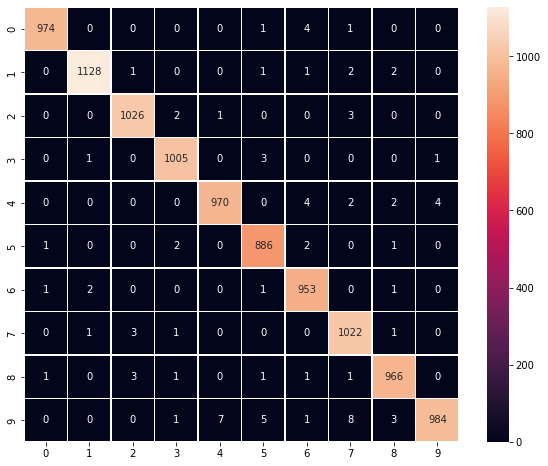

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

We observe that most of the classes are predicted correctly. 

The misclassification mostly with the the digits 4 and 8, which are confused with digit 9.

## **Comparing the number of parameters in ANNs and CNNs**

- The total number of trainable parameters in the ANN were: 79,510.
- The total number of trainable parameters in the CNN are: 80,662.
- For the ANN model, we had to flatten our input image of size (28,28,1) to (784,1). This was followed by two dense layers with the same number of nodes that we used while building the CNN Model.
- **Using just 2 dense layers after Flatten() in the ANN model, resulted in nearly the same number of parameters as the whole CNN model, despite the CNN having the added advantage of multiple convolution layers for feature extraction.**

**This should give a sense for why it makes much more sense to use CNNs for image prediction tasks**, not only because they have added advantages to make use of the spatial nature of information in images, but because they are so much more computationally efficient.

# **Happy Learning!**